Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft
import dataprep as dp

Load data

In [2]:
dataset = dp.load_file('data.csv', dir='files/')
asize = dataset[0].size - 1
dataset = dataset[:, :asize]

In [3]:
dataset

array([[ -1.86250000e-05,  -2.26250000e-05,  -2.62500000e-05, ...,
          1.25000000e-06,   5.87500000e-06,   6.12500000e-06],
       [ -6.00000000e-06,  -2.62500000e-06,  -6.62500000e-06, ...,
          1.07500000e-05,   1.07500000e-05,   9.50000000e-06],
       [  1.27500000e-05,   2.00000000e-06,  -3.00000000e-06, ...,
         -7.75000000e-06,  -5.12500000e-06,   1.37500000e-06],
       ..., 
       [  1.76250000e-05,   1.30000000e-05,   1.47500000e-05, ...,
         -8.37500000e-06,  -7.12500000e-06,  -6.62500000e-06],
       [  1.07500000e-05,   7.50000000e-07,  -4.75000000e-06, ...,
         -3.25000000e-06,  -3.75000000e-07,   7.37500000e-06],
       [  1.63750000e-05,   8.87500000e-06,   9.75000000e-06, ...,
         -1.20000000e-05,  -6.25000000e-06,  -1.87500000e-06]])

# Task 1

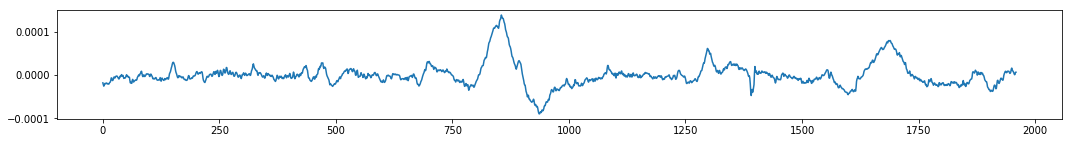

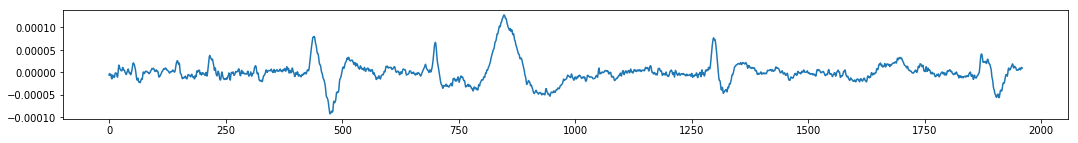

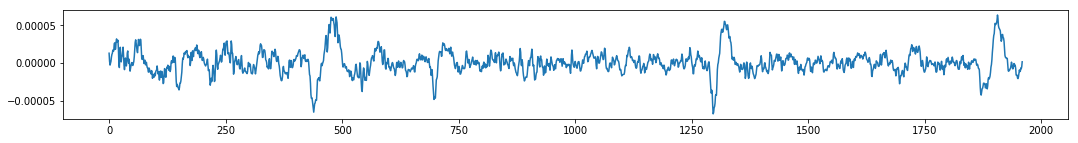

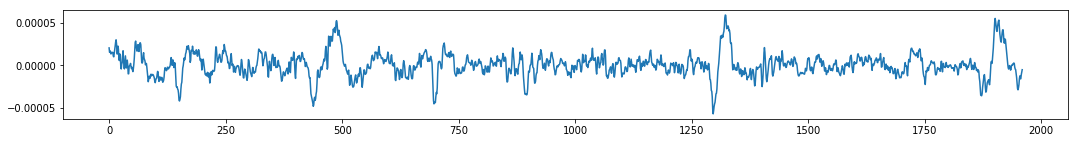

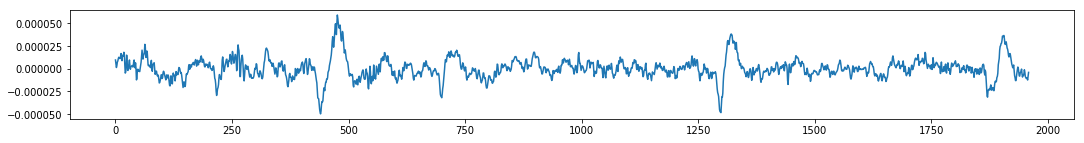

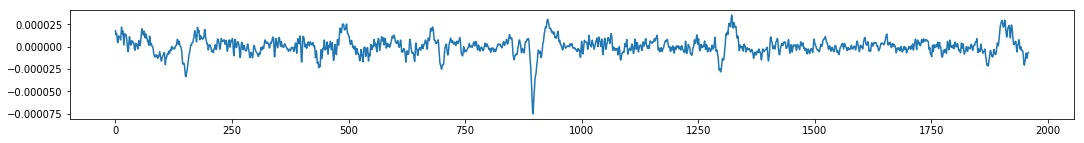

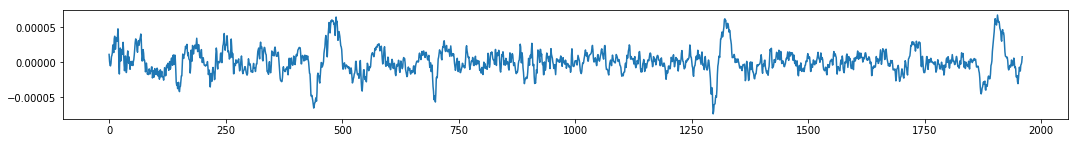

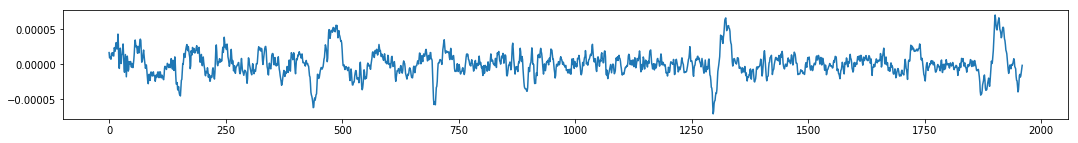

In [4]:
%matplotlib inline
for i in dataset:
    plt.figure(figsize=(18, 2))
    plt.plot(i)
    plt.show()

# Task 2

Define answer list:

In [5]:
ans = []

Calculate mean power on delta, alpha and beta band:

*Remember to change the `step` variable on every cell run (used 0, 3 and 6 for solving the task).*

In [9]:
sec = 121
step = 0 # change manually
t = dataset[0][sec * step:sec * (step + 3)]
fourier = fft.rfft(t)
sampling_rate = 1000 / 8.26
freq = fft.rfftfreq(len(t), 1. / sampling_rate)

sum_delta = 0
sum_alpha = 0
sum_beta = 0
sum_full = 0

for i in range(len(freq)):
    # delta band
    if 4 <= freq[i] < 8:
        magnitude = np.sqrt(fourier[i].real ** 2 + fourier[i].imag ** 2)
        sum_delta += magnitude ** 2
        
    # alpha band
    if 8 <= freq[i] < 14:
        magnitude = np.sqrt(fourier[i].real ** 2 + fourier[i].imag ** 2)
        sum_alpha += magnitude ** 2
        
    # beta band
    if 14 <= freq[i] <= 20:
        magnitude = np.sqrt(fourier[i].real ** 2 + fourier[i].imag ** 2)
        sum_beta += magnitude ** 2
        
    # full band
    if 4 <= freq[i] <= 20:
        magnitude = np.sqrt(fourier[i].real ** 2 + fourier[i].imag ** 2)
        sum_full += magnitude ** 2

ans.append((sum_delta / sum_full, sum_alpha / sum_full, sum_beta / sum_full))

Round the calculated values with 2 digits after the decimal point:

In [10]:
np.round(ans, decimals=2)

array([[ 0.7 ,  0.17,  0.13],
       [ 0.64,  0.18,  0.18],
       [ 0.78,  0.16,  0.07]])